In [1]:
# import the libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob as tb

## Load in the news stories

In [2]:
# define read story function
def read_story(file):
    '''
    This function reads a text file and outputs what's inside.
    
    Args:
        file: text file
        
    Returns: item of type string
    
    '''
    with open(file) as file:
        text = file.read()
    return text

In [4]:
# read in all of the news stories
al_jazeera = read_story("../Data/aljazeera-khashoggi.txt")
fox = read_story("../Data/fox-khashoggi.txt")
bbc = read_story("../Data/bbc-khashoggi.txt")
cnn = read_story("../Data/cnn-khashoggi.txt")
breitbart = read_story("../Data/breitbart-khashoggi.txt")

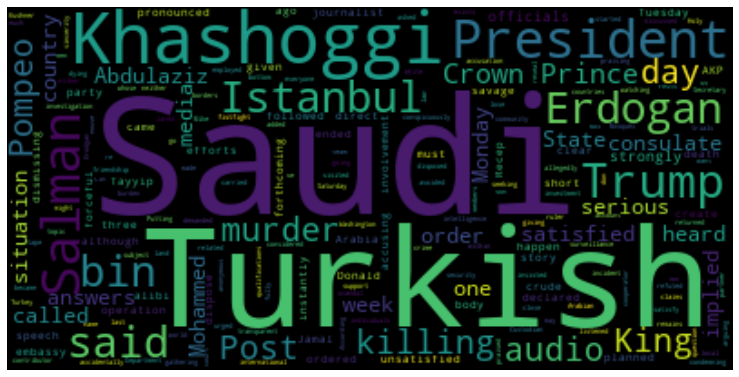

In [8]:
# a preview of the Breitbart piece (will spare you from looking at 5 wordclouds)
# can remove stopwords if preferred
wc = WordCloud().generate(breitbart)
plt.figure(figsize = (13,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
# put the stories in a list
stories = [al_jazeera, cnn, breitbart, fox, bbc]

## Generate the word matrices

In [11]:
# import the stopwords and make them into a list
stopwords = pd.read_csv('../Data/stop_words.csv')
stopwords = stopwords.word.to_list()

In [12]:
# It has 728 words in it!
len(stopwords)

728

In [13]:
# built function that returns evrey story as a list of words
def tokenize(story):
    '''
    This function takes a news story and returns a separated list of all the words within it.
    
    Args:
        story: object of type list
    
    Returns:
        text_list: list of strings
    '''
    text = story.replace('\n', '')\
                .replace('?','')\
                .replace('[','')\
                .replace(']','')\
                .replace('(','')\
                .replace(')','')\
                .replace('.','')\
                .replace("'s",'')\
                .replace('"','')\
                .replace(';','')\
                .replace('—','')\
                .replace('“','')\
                .replace('”','')\
                .replace(",",'')\
                .replace("'",'')\
                .lower().split()
    text_list = [word for word in text if word not in stopwords]
    return text_list

In [14]:
# build a function that converts the text_list into a matrix 
def convert_text_to_dtm(text_list):
    '''
    This function converts text into a dictionary then returns it as a document term matrix.
    
    Args:
        text_list: list of strings
    
    Returns:
        pd.Dataframe: a dataframe of the text dictionary 
    '''
    d = dict()
    for word in tokenize(text_list):
        if word in d:
            d[word][0] += 1
        else:
            d[word] = [1]
    return pd.DataFrame(d)

In [15]:
# Now we make a function that loops through multiple text_lists and does the same 
def gen_DTM(texts=None):
    '''
    This function generates a document term matrix for each item in the list of texts inputted.
    
    Args:
        texts: object of type list
        
    Returns: 
        DTM: object of type dataframe
    '''
    DTM = pd.DataFrame()
    for text in texts:
        entry = convert_text_to_dtm(text)
        DTM = DTM.append(pd.DataFrame(entry),ignore_index=True,sort=True)
    DTM.fillna(0, inplace=True) # Fill in any missing values with 0s (i.e. when a word is in one text but not another)
    return DTM

In [16]:
# run the looping function and get the matrix with all of our stories
DTM = gen_DTM(stories)

In [17]:
# Look at all the words that are in all of our stories
DTM.columns.values

array(['$50bn', '-', '1', '11', '12', '15', '15-member', '18', '1:08',
       '2', '28', '2r', '4:30', '55-mile', '59', '59-year-old',
       '90-kilometer', '9:50', 'abdulaziz', 'absent', 'accident',
       'accidentally', 'accidentallyerdogan', 'account', 'accounts',
       'accusation', 'accusing', 'acknowledged', 'added', 'adding',
       'addition', 'address', 'addressing', 'adel', 'admitted',
       'admitting', 'advance', 'agency', 'ago', 'aides', 'ak', 'akp',
       'al', 'al-jubeir', 'al-qahtani', 'alerted', 'alibi', 'alive',
       'allegation', 'allegedly', 'allowed', 'ally', 'amounted', 'ankara',
       'ankaraamong', 'announced', 'anonymous', 'answered', 'answering',
       'answers', 'anticipated', 'appeared', 'appearing', 'applause',
       'arabia', 'arabian', 'arabia’s', 'arabic', 'arguing', 'arrested',
       'arrests', 'arrival', 'arrived', 'arrives', 'assassination',
       'attempt', 'attempts', 'attendees', 'attributed', 'audience',
       'audio', 'authenticity',

## Calculate cosine similarities between news stories

In [18]:
# make a cosine function 
def cosine(a,b):
    return a.dot(b)/(np.sqrt(a.dot(a)) * np.sqrt(b.dot(b)))

In [19]:
# rename index so I know which row refers to which news outlet
DTM = DTM.rename(index={0: 'al_jazeera',1: 'cnn', 2: 'breitbart',3: 'fox',4: 'bbc'})

In [20]:
# print the current dataframe
DTM

,$50bn,-,1,11,12,15,15-member,18,1:08,2,...,white,widely,withheld,woods,world,worse,writer,yalova,yelova,£385bn
al_jazeera,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cnn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
breitbart,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
fox,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0
bbc,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [21]:
# create empty holder dataframe
DTM_stories = pd.DataFrame(index=np.arange(5), columns = np.arange(5))

In [22]:
pd.DataFrame(np.random.randint(0,5,size=(5, 5)))

,0,1,2,3,4
0,2,1,0,2,3
1,2,1,4,2,2
2,2,0,2,3,1
3,3,0,0,4,0
4,4,1,1,2,2


In [23]:
DTM_stories.index.values

array([0, 1, 2, 3, 4])

In [24]:
# loop through all the stories 
for idx, val in DTM_stories.iterrows():
    for i, entry in enumerate(val):
        DTM_stories.loc[idx,i] = cosine(DTM.iloc[idx],DTM.iloc[i])

In [25]:
# create a list of the news agencies in order
DTM_names = DTM.index.values.tolist()

In [26]:
# rename columns and index
DTM_stories.columns = DTM_names
DTM_stories.index = DTM_names

In [27]:
# change all of the data to floats so I can map it
DTM_stories = DTM_stories.astype(float)

In [28]:
DTM_stories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, al_jazeera to bbc
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   al_jazeera  5 non-null      float64
 1   cnn         5 non-null      float64
 2   breitbart   5 non-null      float64
 3   fox         5 non-null      float64
 4   bbc         5 non-null      float64
dtypes: float64(5)
memory usage: 240.0+ bytes


In [29]:
DTM_stories

,al_jazeera,cnn,breitbart,fox,bbc
al_jazeera,1.000000,0.590220,0.587860,0.712962,0.703341
cnn,0.590220,1.000000,0.374829,0.562141,0.556227
breitbart,0.587860,0.374829,1.000000,0.550207,0.585667
fox,0.712962,0.562141,0.550207,1.000000,0.664715
bbc,0.703341,0.556227,0.585667,0.664715,1.000000


## Visualize and discuss results

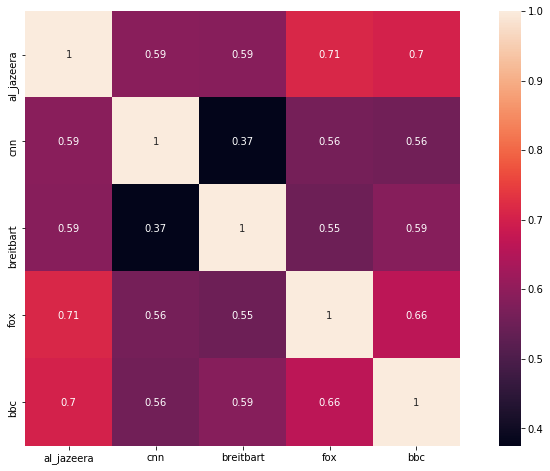

In [30]:
# create heatmap for easier interpretation of correlation matrix
fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(DTM_stories, annot = True, square=True)

As you can see from this heatmap, the sources that are the most similar in terms of their reporting language in regards to the murder of journalist Jamal Khashoggi were Al Jazeera and Fox, with a cosine similarity of 0.71. This was interesting to me because I had always seen Al Jazeera as slightly left-leaning. Of course, being a Doha-based news entity partially funded by the ruling family of Qatar, there are complex political tensions that would influence reporting on Middle Eastern affairs -- in particular, those related to Saudi Arabia (fun fact: in 2017, the Saudi government demanded the closure of the news station as a reaction to the Qatar diplomatic crisis). Al Jazeera and BBC were very similar too.

The two sources that were the least similar were CNN and Breitbart, with a cosine similarity of 0.37, which is not unexpected given that these sources cater to audiences on very different sides of the political spectrum. This assignment reminds me of the new version of the Media Bias Chart by Ad Fontes Media that I saw trending earlier this year (see below).

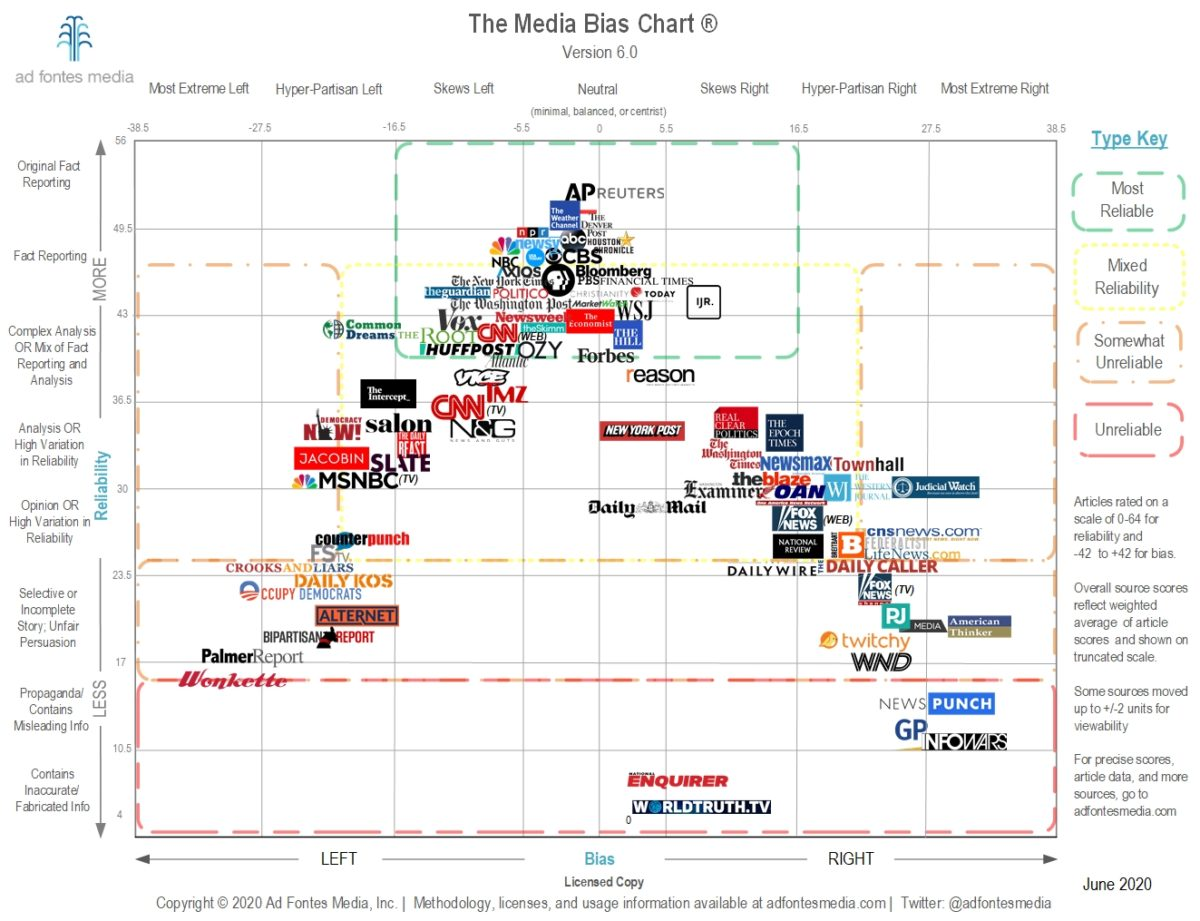

I also tried out the Textblob Sentiment Analyzer, which was interesting. It gives you the polarity (negative/positive) of a text from a scale of -1 to 1, and the subjectivity (objective/subjective) on a scale of 0 to 1, with 1 being the most subjective. According to this analysis, it seems that the most biased, or subjective, outlet is Breitbart and the most objective outlet is, strangely enough, Fox News. Fox News did also have the lowest polarity, indicating that its  reporting sentiment was more negative overall than the other outlets.

In [31]:
# print the subjectivity and polarity of each media outlet as analyzed by textblob
print("Breitbart subjectivity:", tb(breitbart).sentiment.subjectivity, "\nBreitbart polarity:",tb(breitbart).sentiment.polarity)
print("\nCNN subjectivity:", tb(cnn).sentiment.subjectivity, "\nCNN polarity:",tb(cnn).sentiment.polarity)
print("\nFox subjectivity:", tb(fox).sentiment.subjectivity, "\nFox polarity:",tb(fox).sentiment.polarity)
print("\nBBC subjectivity:", tb(bbc).sentiment.subjectivity, "\nBBC polarity:",tb(bbc).sentiment.polarity)
print("\nAl Jazeera subjectivity:", tb(al_jazeera).sentiment.subjectivity, "\nAl Jazeera polarity:",tb(al_jazeera).sentiment.polarity)

Breitbart subjectivity: 0.5185185185185185 
Breitbart polarity: 0.004938271604938271

CNN subjectivity: 0.36032467532467527 
CNN polarity: 0.04081168831168832

Fox subjectivity: 0.29540229885057473 
Fox polarity: -0.0005747126436781589

BBC subjectivity: 0.3526785714285715 
BBC polarity: 0.06488095238095239

Al Jazeera subjectivity: 0.379389880952381 
Al Jazeera polarity: 0.09866071428571428
